# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [3]:
users_df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyecto_5/megaline_users.csv')# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyecto_5/megaline_calls.csv')
messages_df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyecto_5/megaline_messages.csv')
internet_df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyecto_5/megaline_internet.csv')
plans_df = pd.read_csv('/content/drive/MyDrive/colab_notebooks/proyecto_5/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

 ** A continuación se revisan las tablas de los archivos cargados para verificar su estructura **



---






** Observando la preparación de datos, no hay valores ausentes, excepto por la columna churn_date en users_df. Sin embargo, se aclara el por qué son datos ausentes, lo cuál no afectará , así que fuera de eso no tenemos más ausentes.

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

** El DataFrame está bien, todas las columnas cuentan con un formato adecuado, los nombres de las columnas tienen una buena estructura y los datos están completos. No hay valores ausentes. **

In [6]:
#No es necesario

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
#No es necesario

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
users_df.head(30)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

** En este dataframe, las columnas de fechas están originalmente en tipo object, lo cuál quizás no sea lo más adecuado en caso de que quisiéramos hacer análisis a profundidad con las fechas.
También tenemos valores ausentes en la columna 'churn_date', sin embargo, se especifica que el valor ausente significa que la persona todavía seguía inscrita al plan al momento de que se extrajeron los datos. Fuera de eso, no hay ningún otro valor ausente. **

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format = '%Y-%m-%d')
#corregimos el tipo de datos en las columnas anteriormente mencionadas, para darles formatos para fechas.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

** Creo que por el momento no es necesario hacer cambios en los valores ausentes. Ya que se especifica que todos esos valores significa que la persona aún está inscrita en el plan.**

In [11]:
dupli_users = users_df.duplicated().sum()
print(f'Hay {dupli_users} filas duplicadas en el dataframe')#Confirmamos duplicados

print()
users_df.info() #Se confirma el cambio de tipo de datos en las columnas deseadas.

Hay 0 filas duplicadas en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas

calls_df.head(30)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

** También hay que cambiar el tipo de datos de la columna donde está la fecha. Fuera de eso, creo que los demás datos son correctos y no hay valores ausentes. **

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d') #Se hace el cambio al formato de fecha

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

** Confirmamos el cambio de tipo de datos. No hay más que hacer. **

In [15]:
dupli_calls = calls_df.duplicated().sum()
print(f'Hay {dupli_calls} filas duplicadas en el dataframe')#Confirmamos duplicados

calls_df['month'] = calls_df['call_date'].dt.month #Se separa el mes de las llamadas en una nueva columna

print()
calls_df.info() #confirmamos cambio de formatos y columnas

Hay 0 filas duplicadas en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
messages_df.head(30)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

** Hacemos el mismo cambio para dar formato de fecha **

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format = '%Y-%m-%d') #Cambio a formato de fecha

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
dupli_messages = messages_df.duplicated().sum()
print(f'Hay {dupli_messages} filas duplicadas en el dataframe')#Confirmamos duplicados

messages_df['month'] = messages_df['message_date'].dt.month #Se separa el mes de las llamadas en una nueva columna

print()

messages_df.info() #Confirmamos cambio

Hay 0 filas duplicadas en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head(30)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

** Hacemos el mismo cambio para darle formato de fecha **

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d') #realizamos el cambio a formato fecha

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
dupli_internet = internet_df.duplicated().sum()
print(f'Hay {dupli_internet} filas duplicadas en el dataframe')#Confirmamos duplicados

internet_df['month'] = internet_df['session_date'].dt.month #Se separa el mes de las llamadas en una nueva columna

print()
internet_df.info() #confirmamos el cambio

Hay 0 filas duplicadas en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df = plans_df.rename(columns={'plan_name':'plan'})
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
df_users_calls = users_df.merge(calls_df, on = 'user_id') # Creamos un nuevo DF, juntando la información del usuario con la de las llamadas.
df_users_calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_93,2018-12-27,8.52,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_145,2018-12-27,13.66,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_247,2018-12-27,14.48,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_309,2018-12-28,5.76,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_380,2018-12-30,4.22,12
...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_199,2018-11-21,8.72,11
137731,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_200,2018-10-20,10.89,10
137732,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_201,2018-09-21,8.12,9
137733,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_202,2018-10-10,0.37,10


In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month_by_user = df_users_calls.groupby(['user_id', 'month','plan'])['id'].count() #Agrupamos utilizando .groupby para poder tener un conteo de llamadas, en base a usuario y mes.
calls_per_month_by_user


user_id  month  plan    
1000     12     ultimate    16
1001     8      surf        27
         9      surf        49
         10     surf        65
         11     surf        64
                            ..
1498     12     surf        39
1499     9      surf        41
         10     surf        53
         11     surf        45
         12     surf        65
Name: id, Length: 2258, dtype: int64

In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month_by_user = df_users_calls.groupby(['user_id','month','plan'])['duration'].sum()

#El siguiente código es utilizando una tabla dinámica, pero no se usó al final
#minutes_per_month_by_user = df_users_calls.pivot_table(index= 'user_id', columns= 'month', values= 'duration', aggfunc= 'sum')

minutes_per_month_by_user


user_id  month  plan    
1000     12     ultimate    116.83
1001     8      surf        171.14
         9      surf        297.69
         10     surf        374.11
         11     surf        404.59
                             ...  
1498     12     surf        324.77
1499     9      surf        330.37
         10     surf        363.28
         11     surf        288.56
         12     surf        468.10
Name: duration, Length: 2258, dtype: float64

In [28]:
df_users_messages = users_df.merge(messages_df, on= 'user_id') #Creamos un nuevo DF combinando la info de usuarios y mensajes
df_users_messages

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_125,2018-12-27,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_160,2018-12-31,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_223,2018-12-31,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_251,2018-12-27,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_255,2018-12-26,12
...,...,...,...,...,...,...,...,...,...,...,...
76046,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_526,2018-12-24,12
76047,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_536,2018-12-24,12
76048,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_547,2018-12-31,12
76049,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,1497_558,2018-12-24,12


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month_by_user = df_users_messages.groupby(['user_id','month','plan'])['id'].count() #Creamos una agrupación groupby para representar cuántos mensajes envió cada usuario en todos los meses del año.


messages_per_month_by_user


user_id  month  plan    
1000     12     ultimate    11
1001     8      surf        30
         9      surf        44
         10     surf        53
         11     surf        36
                            ..
1496     9      surf        21
         10     surf        18
         11     surf        13
         12     surf        11
1497     12     ultimate    50
Name: id, Length: 1806, dtype: int64

In [30]:
df_users_internet = users_df.merge(internet_df, on='user_id') #Combinamos el dataframe de internet con usuarios
df_users_internet

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_13,2018-12-29,89.86,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_204,2018-12-31,0.00,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_379,2018-12-28,660.40,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_413,2018-12-26,270.99,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000_442,2018-12-27,880.22,12
...,...,...,...,...,...,...,...,...,...,...,...,...
104820,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_215,2018-10-20,218.06,10
104821,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_216,2018-12-30,304.72,12
104822,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_217,2018-09-22,292.75,9
104823,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,1499_218,2018-12-07,0.00,12


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month_by_user = df_users_internet.groupby(['user_id','month','plan'])['mb_used'].sum()

#Creamos una agrupación groupby para representar cuántos mbs usó cada usuario en todos los meses del año.

internet_per_month_by_user



user_id  month  plan    
1000     12     ultimate     1901.47
1001     8      surf         6919.15
         9      surf        13314.82
         10     surf        22330.49
         11     surf        18504.30
                              ...   
1498     12     surf        23137.69
1499     9      surf        12984.76
         10     surf        19492.43
         11     surf        16813.83
         12     surf        22059.21
Name: mb_used, Length: 2277, dtype: float64

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [32]:
user_month_plan = df_users_calls[['user_id','month','plan']]
user_month_plan

,user_id,month,plan
0,1000,12,ultimate
1,1000,12,ultimate
2,1000,12,ultimate
3,1000,12,ultimate
4,1000,12,ultimate
...,...,...,...
137730,1499,11,surf
137731,1499,10,surf
137732,1499,9,surf
137733,1499,10,surf


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


df_user_by_month = pd.concat([internet_per_month_by_user,messages_per_month_by_user,minutes_per_month_by_user], axis = 'columns') #Concatenamos los groupbys que tenemos de cada servicio que nos dicen los datos de uso de cada servicio en el plan mensualmente por usuario
df_user_by_month.reset_index(inplace = True) #Reestablecemos el índice, ya que si no lo hacemos, se pierden los índices de user_id y month al hacer la siguiente combinación con los planes


df_user_by_month




,user_id,month,plan,mb_used,id,duration
0,1000,12,ultimate,1901.47,11.0,116.83
1,1001,8,surf,6919.15,30.0,171.14
2,1001,9,surf,13314.82,44.0,297.69
3,1001,10,surf,22330.49,53.0,374.11
4,1001,11,surf,18504.30,36.0,404.59
...,...,...,...,...,...,...
2288,1470,12,surf,NaN,153.0,560.44
2289,1482,10,ultimate,NaN,2.0,NaN
2290,1484,11,surf,NaN,1.0,37.50
2291,1491,4,surf,NaN,6.0,40.45


In [34]:
# Añade la información de la tarifa
df_user_by_month_plan_info = df_user_by_month.merge(plans_df, on='plan') #Combinamos el dataframe con la info mensual de cada servicio con la info de cada plan
df_user_by_month_plan_info = df_user_by_month_plan_info.rename(columns={'id':'mssgs_sent','duration':'on_call_min'}) #Cambiamos algunos nombres de columnas para hacerlos un poco más claros
df_user_by_month_plan_info = df_user_by_month_plan_info.fillna(0) #Cambiamos los valores ausentes a 0 para que no afecte nuestras operaciones, no importa, ya que si hay valores ausentes en este punto es porque no se usó ese servicio en ese mes
df_user_by_month_plan_info


,user_id,month,plan,mb_used,mssgs_sent,on_call_min,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,ultimate,1901.47,11.0,116.83,1000,30720,3000,70,7,0.01,0.01
1,1001,8,surf,6919.15,30.0,171.14,50,15360,500,20,10,0.03,0.03
2,1001,9,surf,13314.82,44.0,297.69,50,15360,500,20,10,0.03,0.03
3,1001,10,surf,22330.49,53.0,374.11,50,15360,500,20,10,0.03,0.03
4,1001,11,surf,18504.30,36.0,404.59,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,12,surf,0.00,153.0,560.44,50,15360,500,20,10,0.03,0.03
2289,1482,10,ultimate,0.00,2.0,0.00,1000,30720,3000,70,7,0.01,0.01
2290,1484,11,surf,0.00,1.0,37.50,50,15360,500,20,10,0.03,0.03
2291,1491,4,surf,0.00,6.0,40.45,50,15360,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario

#Creamos una función para que recorra las filas del dataframe
def income_calc( row ):

  minutes_passed = row['on_call_min'] - row['minutes_included'] #Se hace la resta para saber por cuántos minutos se pasó el usuario
  minutes_income = np.where(minutes_passed < 0, 0 , minutes_passed) * row['usd_per_minute'] #Si el número es negativo, significa que le sobraron minutos, usamos la función np.where() para redondear a 0 y multiplicamos por el cobro de adicionales

  messages_passed = row['mssgs_sent'] - row['messages_included'] #Hacemos los mismo para los mensajes
  messages_income = np.where(messages_passed < 0, 0 , messages_passed) * row['usd_per_message']#Redondeamos a 0 los negativos y multiplicamos por cobro adicional

  megas_passed = (row['mb_used'] - row['mb_per_month_included'])/1000 #Hacemos la misma resta para el uso de megas, sin embargo aquí dividimos entre 1000 para convertir los megas a gigas, ya que el cobro por adicionales está en gigas
  gb_roundup = mt.ceil(megas_passed) #Usamos esta función para redondear los gigas hacia arriba, ya que la compañía cobra redondeando el giga hacia arriba.
  megas_income = np.where(gb_roundup < 0, 0 , gb_roundup) * row['usd_per_gb'] # Redondeamos negativos a 0 y multiplicamos por cobro adicional.

  row['monthly_income'] = minutes_income + messages_income + megas_income + row['usd_monthly_pay'] #Por último creamos nuestra nueva columna en el dataframe sumando todods los cobros adicionales y pago mensual fijo.

  return row #Con esto terminamos nuestra función utilizando el return para mostrar nuestras filas


df_user_by_month_plan_info = df_user_by_month_plan_info.apply(income_calc, axis = 1) #usamos .apply para aplicar la función a todo el dataframe
df_user_by_month_plan_info

,user_id,month,plan,mb_used,mssgs_sent,on_call_min,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_income
0,1000,12,ultimate,1901.47,11.0,116.83,1000,30720,3000,70,7,0.01,0.01,70.0000
1,1001,8,surf,6919.15,30.0,171.14,50,15360,500,20,10,0.03,0.03,20.0000
2,1001,9,surf,13314.82,44.0,297.69,50,15360,500,20,10,0.03,0.03,20.0000
3,1001,10,surf,22330.49,53.0,374.11,50,15360,500,20,10,0.03,0.03,90.0900
4,1001,11,surf,18504.30,36.0,404.59,50,15360,500,20,10,0.03,0.03,60.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,12,surf,0.00,153.0,560.44,50,15360,500,20,10,0.03,0.03,24.9032
2289,1482,10,ultimate,0.00,2.0,0.00,1000,30720,3000,70,7,0.01,0.01,70.0000
2290,1484,11,surf,0.00,1.0,37.50,50,15360,500,20,10,0.03,0.03,20.0000
2291,1491,4,surf,0.00,6.0,40.45,50,15360,500,20,10,0.03,0.03,20.0000


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

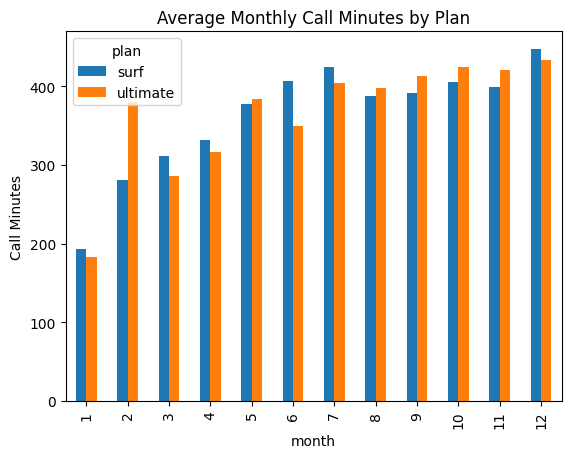

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

plan_minu_mean_month = df_user_by_month_plan_info.pivot_table(index= 'month', columns = 'plan', values = 'on_call_min', aggfunc= 'mean')

plan_minu_mean_month.plot(kind = 'bar', ylabel = 'Call Minutes', title= 'Average Monthly Call Minutes by Plan')

plt.show()


plan             surf  ultimate
user_id month                  
1000    12        NaN    116.83
1001    8      171.14       NaN
        9      297.69       NaN
        10     374.11       NaN
        11     404.59       NaN
...               ...       ...
1498    12     324.77       NaN
1499    9      330.37       NaN
        10     363.28       NaN
        11     288.56       NaN
        12     468.10       NaN

[2293 rows x 2 columns]


<Axes: ylabel='Frequency'>

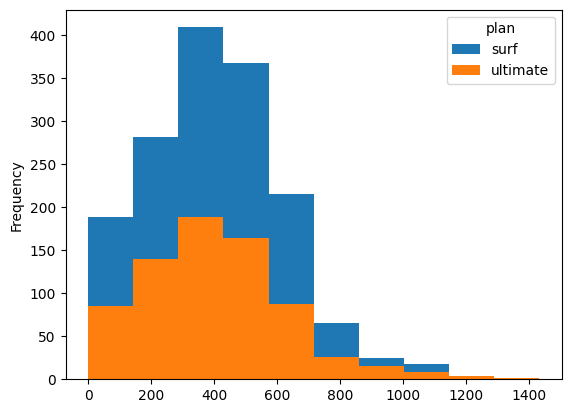

In [37]:

# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plan_minu_month = df_user_by_month_plan_info.pivot_table(index= ['user_id','month'], columns = 'plan', values = 'on_call_min')
print(plan_minu_month)
plan_minu_month.plot(kind = 'hist')


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.
only_ultimate = df_user_by_month_plan_info[df_user_by_month_plan_info['plan'] == 'ultimate'] #Filtramos el dataframe que contiene todos los datos para que solo nos muestre los datos del plan ultimate

ultimate_duration_month_mean = only_ultimate.groupby(['month'])['on_call_min'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
ultimate_duration_month_variance = only_ultimate.groupby(['month'])['on_call_min'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de minutos mensuales en el plan ultimate es:', ultimate_duration_month_mean)
print('La varianza de minutos mensuales en el plan ultimate es:', ultimate_duration_month_variance)


only_surf = df_user_by_month_plan_info[df_user_by_month_plan_info['plan'] == 'surf'] #Filtramos el dataframe que contiene todos los datos para que solo nos muestre los datos del plan surf

surf_duration_month_mean = only_surf.groupby(['month'])['on_call_min'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
surf_duration_month_variance = only_surf.groupby(['month'])['on_call_min'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de minutos mensuales en el plan surf es:', surf_duration_month_mean)
print('La varianza de minutos mensuales en el plan surf es:', surf_duration_month_variance)


El Promedio de minutos mensuales en el plan ultimate es: month
1     183.162500
2     379.861429
3     285.701667
4     316.508095
5     383.664828
6     349.811064
7     403.767288
8     397.274789
9     413.287326
10    425.168019
11    420.477559
12    433.012583
Name: on_call_min, dtype: float64
La varianza de minutos mensuales en el plan ultimate es: month
1     14991.369958
2     68540.288348
3     54273.917252
4     31057.727496
5     39290.610940
6     37923.360514
7     64844.426958
8     47680.189425
9     50994.505514
10    48371.222127
11    54265.152604
12    55781.717507
Name: on_call_min, dtype: float64
El Promedio de minutos mensuales en el plan surf es: month
1     192.840000
2     280.851111
3     310.970000
4     332.380000
5     377.053247
6     407.208866
7     424.523223
8     387.169630
9     390.992062
10    405.692363
11    399.599823
12    447.475283
Name: on_call_min, dtype: float64
La varianza de minutos mensuales en el plan surf es: month
1     14795.440200

<Axes: >

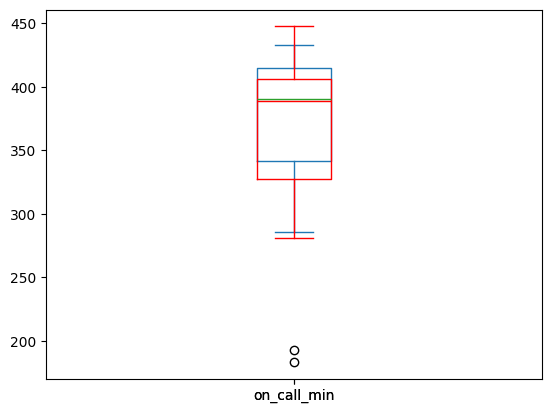

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
ultimate_duration_month_mean.plot(kind = 'box')


surf_duration_month_mean.plot(kind = 'box', color = 'red')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

** Parece ser que el comportamiento de los usuarios en realidad no difiere mucho en relación al plan al que estén suscritos. De hecho la media permanece cerca de los 400 en ambos planes. A pesar de que si hay datos sesgados, los planes en realidad tienen mucha similaridad en cuanto a uso regular. **

### Mensajes

In [40]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


ultimate_messages_month_mean = only_ultimate.groupby(['month'])['mssgs_sent'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
ultimate_messages_month_variance = only_ultimate.groupby(['month'])['mssgs_sent'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de mensajes mensuales en el plan ultimate es:', ultimate_duration_month_mean)
print('La varianza de mensajes mensuales en el plan ultimate es:', ultimate_duration_month_variance)



surf_messages_month_mean = only_surf.groupby(['month'])['mssgs_sent'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
surf_messages_month_variance = only_surf.groupby(['month'])['mssgs_sent'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de mensajes mensuales en el plan surf es:', surf_messages_month_mean)
print('La varianza de mensajes mensuales en el plan surf es:', surf_messages_month_variance)



El Promedio de mensajes mensuales en el plan ultimate es: month
1     183.162500
2     379.861429
3     285.701667
4     316.508095
5     383.664828
6     349.811064
7     403.767288
8     397.274789
9     413.287326
10    425.168019
11    420.477559
12    433.012583
Name: on_call_min, dtype: float64
La varianza de mensajes mensuales en el plan ultimate es: month
1     14991.369958
2     68540.288348
3     54273.917252
4     31057.727496
5     39290.610940
6     37923.360514
7     64844.426958
8     47680.189425
9     50994.505514
10    48371.222127
11    54265.152604
12    55781.717507
Name: on_call_min, dtype: float64
El Promedio de mensajes mensuales en el plan surf es: month
1     10.500000
2     12.000000
3     15.260870
4     17.400000
5     24.012987
6     25.298969
7     27.033058
8     28.777778
9     30.762887
10    33.839662
11    32.385159
12    38.600629
Name: mssgs_sent, dtype: float64
La varianza de mensajes mensuales en el plan surf es: month
1      220.500000
2      38

<Axes: >

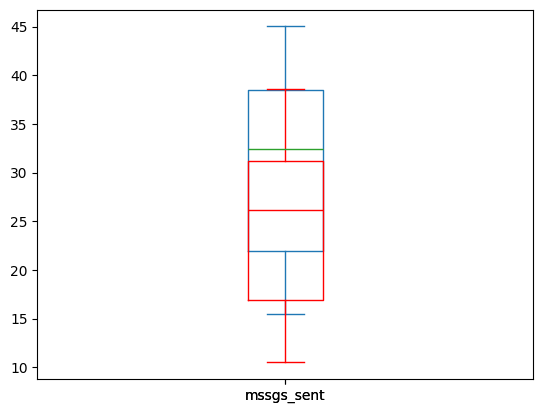

In [41]:
ultimate_messages_month_mean.plot(kind = 'box')


surf_messages_month_mean.plot(kind = 'box', color = 'red')



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

** En base al plan, varía mucho el uso de mensajes. Pareciera ser que las medias de ambos planes están muy separadas, para el plan surf, se usan en promedio unos 26 mensajes al mes, aproximadamente. Sin embargo, para el plan ultimate, la cantidad aumenta a los 33 mensajes, aproximadamente. Fuera de que el plan "ultimate" aumenta en uso, el comportamiento de los usuarios entre ambos planes es muy similar. Es probable que la disponibilidad de usar más mensajes en ese plan influya en el usuario para querer hacer uso de ellos y por otro lado, los usuarios en el plan "surf", intentan moderarse más. **

### Internet

In [42]:
ultimate_megas_month_mean = only_ultimate.groupby(['month'])['mb_used'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
ultimate_megas_month_variance = only_ultimate.groupby(['month'])['mb_used'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de megas mensuales en el plan ultimate es:', ultimate_megas_month_mean)
print('La varianza de megas mensuales en el plan ultimate es:', ultimate_megas_month_variance)



surf_megas_month_mean = only_surf.groupby(['month'])['mb_used'].mean() #Agrupamos por mes para que nos muestre la media de los minutos usados mensuales
surf_megas_month_variance = only_surf.groupby(['month'])['mb_used'].var() #Agrupamos por mes para que nos muestre la varianza de los minutos usados mensuales

print('El Promedio de megas mensuales en el plan surf es:', surf_megas_month_mean)
print('La varianza de megas mensuales en el plan surf es:', surf_megas_month_variance)

El Promedio de megas mensuales en el plan ultimate es: month
1      6918.092500
2     17128.808571
3     18321.518333
4     16121.654762
5     16624.482414
6     15337.921064
7     16344.744407
8     17814.720141
9     16969.869535
10    17612.553396
11    17033.685354
12    18323.191854
Name: mb_used, dtype: float64
La varianza de megas mensuales en el plan ultimate es: month
1     1.639471e+07
2     3.764910e+07
3     1.403392e+08
4     8.842861e+07
5     5.679012e+07
6     7.201453e+07
7     6.841921e+07
8     6.044708e+07
9     4.933904e+07
10    5.699528e+07
11    5.758948e+07
12    6.188130e+07
Name: mb_used, dtype: float64
El Promedio de megas mensuales en el plan surf es: month
1      4874.860000
2     12178.843333
3     13345.440000
4     11984.203000
5     13936.354935
6     15301.529175
7     16783.600579
8     16795.331358
9     16591.431289
10    17311.335063
11    16339.254417
12    18132.469371
Name: mb_used, dtype: float64
La varianza de megas mensuales en el plan surf 

<Axes: >

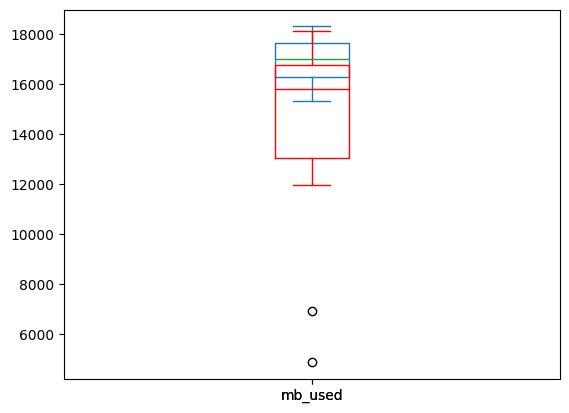

In [43]:
ultimate_megas_month_mean.plot(kind = 'box')


surf_megas_month_mean.plot(kind = 'box', color = 'red')


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

** Tal parece que el consumo de internet es el servicio que la gente usa de manera más parecida. Podemos apreciar que en el plan "ultimate", la mayoría de los usuarios tienden a estar en un consumo de entre 16,000 y 18,000. Una distribución bastante menor. Así que los datos se acercan mucho a la media que ronda por los 17,000 mbs.
El plan surf, por el contrario, tiene un uso menor, con su media rondando los 15,500 mbs. Los usuarios en este plan tienden a variar más en el consumo de sus datos móbiles, sin embargo no hay muchos datos lejanos a la media.

Esta información nos hace pensar que el servicio de internet es el más redituable de los tres, ya que la grente lo usa de manera más equitativa y frecuente, entonces puede tener una remuneración positiva. **

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [44]:
ultimate_monthly_income_mean = only_ultimate.groupby('month')['monthly_income'].mean()
ultimate_monthly_income_var = only_ultimate.groupby('month')['monthly_income'].var()
print('El promedio de ingresos mensuales en el plan ultimate es:', ultimate_monthly_income_mean)
print()
print('La varianza de ingresos mensuales en el plan ultimate es:', ultimate_monthly_income_var)

print()
print()

surf_monthly_income_mean = only_surf.groupby('month')['monthly_income'].mean()
surf_monthly_income_var = only_surf.groupby('month')['monthly_income'].var()
print('El promedio de ingresos mensuales en el plan surf es:', surf_monthly_income_mean)
print()
print('La varianza de ingresos mensuales en el plan surf es:', surf_monthly_income_var)





El promedio de ingresos mensuales en el plan ultimate es: month
1     70.000000
2     70.000000
3     74.666667
4     73.333333
5     70.724138
6     71.638298
7     72.016949
8     72.859155
9     72.034884
10    72.311321
11    71.818898
12    73.430464
Name: monthly_income, dtype: float64

La varianza de ingresos mensuales en el plan ultimate es: month
1       0.000000
2       0.000000
3     145.515152
4     154.933333
5      15.206897
6      75.018501
7     118.361777
8     154.808451
9      75.939945
10    169.606918
11    106.720910
12    229.886799
Name: monthly_income, dtype: float64


El promedio de ingresos mensuales en el plan surf es: month
1     20.000000
2     35.367844
3     46.225043
4     41.054700
5     47.884505
6     49.240013
7     63.131033
8     64.621944
9     58.670190
10    65.637427
11    58.441534
12    70.794511
Name: monthly_income, dtype: float64

La varianza de ingresos mensuales en el plan surf es: month
1        0.000000
2      530.441286
3     1579.41

<Axes: >

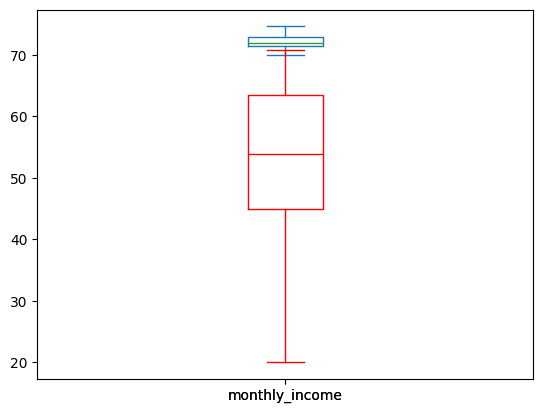

In [45]:
ultimate_monthly_income_mean.plot(kind = 'box')

surf_monthly_income_mean.plot(kind = 'box', color = 'red')

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


** El plan "ultimate", tiene significativamente menor distribución que el plan "surf". Además de que el plan "ultimate" tiene una media un poco arriba de los 70 dólares. Eso quiere decir que la mayoría de los usuarios en este plan, pagan más de 70 dólares al mes. Mientras que el plan "surf" tiene una distribución mucho mayor y a pesar de que su rango intercuartílico ronda entre los 45 y 62 dólares, hay muchos usuarios que pueden pagar entre 20 y 40 dólares, haciendo el plan "surf", un plan mucho más inestable e inconsistente.

En conclusión, el plan "ultimate" es el plan más redituable, confiable y al que más se le puede sacar provecho. **

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis
#Hipótesis nula = 'El plan SURF y el plan ULTIMATE, tienen los mimsos promedios en ingresos mensuales, sin variaciones.'
#Hipótesis alternativa = 'El plan SURF y el plan ULTIMATE, manejan diferentes promedios de ingresos mensuales.'
alpha = 0.05

results = st.ttest_ind(ultimate_monthly_income_mean, surf_monthly_income_mean, equal_var = False)

print('valor p =', results.pvalue)

if(results.pvalue < alpha):
  print('Rechazamos la hipótesis nula')
else:
  print('No podemos rechazar la hipótesis nula')



valor p = 0.0005648311350132273
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [47]:
# Prueba las hipótesis
#Hipótesis Nula = 'No habrá ninguna diferencia en el ingreso promedio entre los usuarios de NY-NJ y los otros usuarios'

In [51]:
#Realizamos un filtrado para poder crear un dataframe con las columnas necesarias
user_income = df_user_by_month_plan_info.drop(df_user_by_month_plan_info.columns[2:13], axis=1)
user_income_area = user_income.merge(users_df, on = 'user_id')
user_income_area

#Creamos la media de los ingresos por mes para los usuarios en el area NY-NJ
ny_nj_income_df = user_income_area[user_income_area['city'].str.contains('NY-NJ')] #Filtramos para que solo aparezcan los clientes de la zona NY-NJ
ny_nj_income_mean = ny_nj_income_df.groupby('month')['monthly_income'].mean() #Conseguimos el valor de la media
ny_nj_income_var = ny_nj_income_df.groupby('month')['monthly_income'].var() #Revisamos el valor de la varianza
print(ny_nj_income_var)


month
2     1250.000000
3      855.085768
4     1035.729406
5     1105.856858
6     1463.955519
7     1211.232419
8     1800.027859
9     1784.323672
10    2411.002023
11    2739.720264
12    2058.440381
Name: monthly_income, dtype: float64


In [52]:
# Creamos la media de los ingresos por mes para los usuarios fuera del area NY-NJ
other_areas_income_df = user_income_area[~user_income_area['city'].str.contains('NY-NJ')] #Filtramos para que solo aparezcan clientes que no sean de la zona NY-NJ
other_areas_income_mean = other_areas_income_df.groupby('month')['monthly_income'].mean() #Conseguimos el valor de la media
other_areas_income_var = other_areas_income_df.groupby('month')['monthly_income'].var() #Revisamos el valor de la varianza
print(other_areas_income_var)

month
1      666.666667
2      588.190895
3     1314.758110
4     1209.721968
5     1710.652501
6     1508.385263
7     2299.580249
8     2867.754677
9     1653.097795
10    2311.676858
11    1719.846449
12    3536.261697
Name: monthly_income, dtype: float64


In [55]:
alpha = 0.05

results2 = st.ttest_ind(ny_nj_income_mean, other_areas_income_mean, equal_var = False)

print('valor p =', results2.pvalue)

if(results2.pvalue < alpha):
  print('Rechazamos la hipótesis nula')
else:
  print('No podemos rechazar la hipótesis nula')


valor p = 0.0790397138498496
No podemos rechazar la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1.- El uso de servicio de llamadas puede ser muy cambiante mes con mes. No es un servicio estable. Si importar qué tipo de plan se utilice, concuerdan con este resultado.
2.- El servicio de mensajes es un poco más estable y se ve mayor uso de este en el plan ULTIMATE.
3.- El servicio de internet es el servicio más sólido de todos. La gran parte de los usuarios utilizan su servicio de internet en gran medida, sin embargo, podemos observar que el plan ULTIMATE tiene una mucho mayor consistencia en cuanto al uso de los datos, hay una distribución muy baja, haciendo de este plan el mejor plan para trabajar.
4.- Trabajar en campañas para el plan ULTIMATE podría ser lo más óptimo, ya que es el plan que genera más ingresos y con una media más alta a la del plan SURF.
5.- Aparentemente es improbable suponer que la zona NY-NJ es significativamente diferente a las otras zonas en donde se ofrece el plan.
